# Credit Card Fraud Detection

### Importing the libraries & dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### EDA

#### Size & information of dataset

In [3]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### Statistical Description of dataset

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Checking missing values

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Seperating the independent and dependent features

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print('Data shape:', df.shape)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print('X shape:',X.shape)
print('y shape:',y.shape)

Data shape: (284807, 31)
X shape: (284807, 30)
y shape: (284807,)


In [6]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

#### Initialising 0 as Not fraud and 1 as Fraud in Y dataset

In [14]:
classes = {0:'Not Fraud', 1:'Fraud'}
print(df.Class.value_counts().rename(index = classes))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


#### Identifying percentage of Not Fraud cases out of total cases

In [15]:
(284315/284807)*100

99.82725143693798

#### Analysing the distribution of Dependent feature

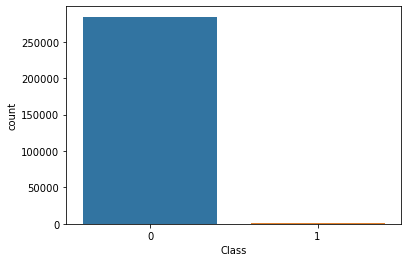

No. of total values for 0 and 1 in Class: 
 0    284315
1       492
Name: Class, dtype: int64


In [7]:
sns.countplot(y, data=df)
plt.show()
print('No. of total values for 0 and 1 in Class: \n',df['Class'].value_counts())

From above plot, we can clearly see that the data is highly imbalanced

### Implementing OverSampling method

In [8]:
!pip install imblearn

Previously = 284807
for 0(Not Fraud) = 284315
for 1(Fraud) = 492

75% of 0's0(Not Fraud) = 213236

total records = 284315 + 213236 = 497551

In [18]:
284315* 0.75

213236.25

In [19]:
284315+213236

497551

In [9]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(0.75)
X_res, y_res = os.fit_resample(X,y)
X_res.shape,y_res.shape

((497551, 30), (497551,))

#### Analysing again the distribution after oversampling

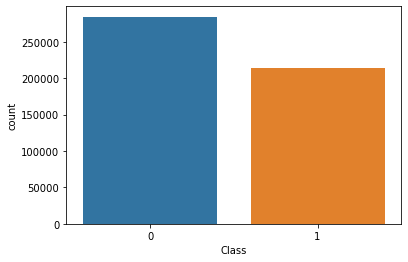

No. of total values for 0 and 1 in Class: 
 0    284315
1    213236
Name: Class, dtype: int64


In [10]:
sns.countplot(y_res)
plt.show()
print('No. of total values for 0 and 1 in Class: \n',y_res.value_counts())

#### Importing different  Libraries for building a model and Evaluation Metrics

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=.2, random_state=0, shuffle=True)

#Train
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)

#Test
print('X_test shape:',X_test.shape)
print('y_test:',y_test.shape)

X_train shape: (398040, 30)
y_train shape: (398040,)
X_test shape: (99511, 30)
y_test: (99511,)


#### Logistic Regression

Logistic Regression Train Score:  92.59
Logistic Regression Test Score:  92.48


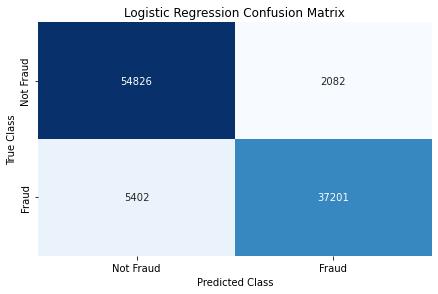

In [17]:
#Logistic Regression Model
LRModel = LogisticRegression()
LRModel.fit(X_train, y_train)
LRModel_y_pred = LRModel.predict(X_test)


#Score
LRModel_TrainScore =  round(LRModel.score(X_train, y_train) * 100, 2)
LRModel_TestScore = round(LRModel.score(X_test, y_test) * 100, 2)

print('Logistic Regression Train Score: ', LRModel_TrainScore)
print('Logistic Regression Test Score: ', LRModel_TestScore)


#Confusion Matrix
LRModel_CM = confusion_matrix(y_test, LRModel_y_pred)
classes_names = ['Not Fraud', 'Fraud']
LRModel_ConfusionMatrix = pd.DataFrame(LRModel_CM, index=classes_names, columns=classes_names)

sns.heatmap(LRModel_ConfusionMatrix, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Logistic Regression Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

#### Support Vector Classification

SVC Train Score:  67.69
SVC Test Score:  67.81


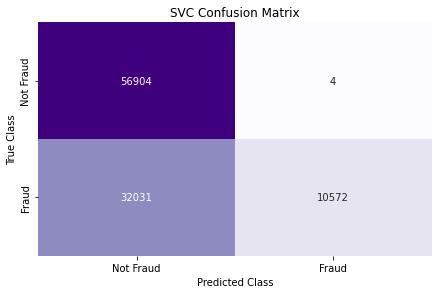

In [18]:
#SVC Model
SVCModel = SVC(kernel= 'rbf', max_iter=100, C=1.0, gamma='auto')
SVCModel.fit(X_train, y_train)
SVCModel_y_pred = SVCModel.predict(X_test)

#Score
SVCModel_TrainScore =  round(SVCModel.score(X_train, y_train) * 100, 2)
SVCModel_TestScore = round(SVCModel.score(X_test, y_test) * 100, 2)

print('SVC Train Score: ', SVCModel_TrainScore)
print('SVC Test Score: ',SVCModel_TestScore)


#Confusion Matrix
SVCModel_CM = confusion_matrix(y_test, SVCModel_y_pred)
SVCModel_ConfusionMatrix = pd.DataFrame(SVCModel_CM, index=classes_names, columns=classes_names)

sns.heatmap(SVCModel_ConfusionMatrix, annot=True, cbar=None, cmap="Purples", fmt = 'g')

plt.title("SVC Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

#### Decision Tree

Decision Tree Train Score:  96.7
Decision Tree Test Score:  96.74


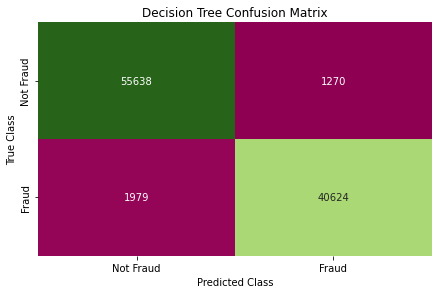

In [19]:
#Decision Tree Model
DecisionTreeModel = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=33) #criterion can be entropy
DecisionTreeModel.fit(X_train, y_train)
DecisionTreeModel_y_pred = DecisionTreeModel.predict(X_test)


#Score
DecisionTreeModel_TrainScore =  round(DecisionTreeModel.score(X_train, y_train) * 100, 2)
DecisionTreeModel_TestScore = round(DecisionTreeModel.score(X_test, y_test) * 100, 2)

print('Decision Tree Train Score: ' , DecisionTreeModel_TrainScore)
print('Decision Tree Test Score: ' , DecisionTreeModel_TestScore)


#Confusion Matrix
DecisionTreeModel_CM = confusion_matrix(y_test, DecisionTreeModel_y_pred)
DecisionTreeModel_ConfusionMatrix = pd.DataFrame(DecisionTreeModel_CM, index=classes_names, columns=classes_names)

sns.heatmap(DecisionTreeModel_ConfusionMatrix, annot=True, cbar=None, cmap="PiYG", fmt = 'g')
plt.title("Decision Tree Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

#### Random Forest

RandomForestModel Train Score:  95.77
RandomForestModel Test Score:  95.79


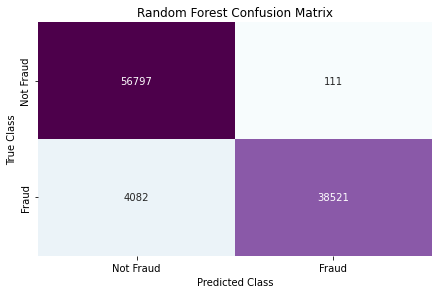

In [20]:
#Random Forest Model
RandomForestModel = RandomForestClassifier(criterion = 'gini',n_estimators=200,max_depth=5,random_state=33, n_jobs=-1)
RandomForestModel.fit(X_train, y_train)
RandomForestModel_y_pred = RandomForestModel.predict(X_test)


#Score
RandomForestModel_TrainScore =  round(RandomForestModel.score(X_train, y_train) * 100, 2)
RandomForestModel_TestScore = round(RandomForestModel.score(X_test, y_test) * 100, 2)

print('RandomForestModel Train Score: ' , RandomForestModel_TrainScore)
print('RandomForestModel Test Score: ' , RandomForestModel_TestScore)


#Confusion Matrix
RandomForestModel_CM = confusion_matrix(y_test, RandomForestModel_y_pred)
RandomForestModel_ConfusionMatrix = pd.DataFrame(RandomForestModel_CM, index=classes_names, columns=classes_names)

sns.heatmap(RandomForestModel_ConfusionMatrix, annot=True, cbar=None, cmap="BuPu", fmt = 'g')
plt.title("Random Forest Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

#### Analysing different models

In [21]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machines'],
    'Train Score': [LRModel_TrainScore, DecisionTreeModel_TrainScore, RandomForestModel_TrainScore, SVCModel_TrainScore],
    'Test Score': [LRModel_TestScore, DecisionTreeModel_TestScore, RandomForestModel_TestScore, SVCModel_TestScore]})

models.sort_values(['Train Score', 'Test Score'], ascending=[False, False])

,Model,Train Score,Test Score
1,Decision Tree,96.70,96.74
2,Random Forest,95.77,95.79
0,Logistic Regression,92.59,92.48
3,Support Vector Machines,67.69,67.81


### ROC curve

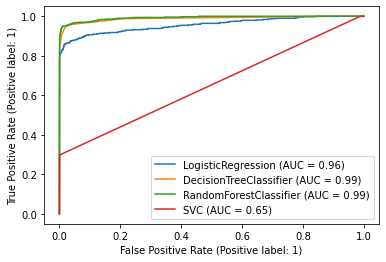

In [22]:
from sklearn.metrics import plot_roc_curve
fig = plot_roc_curve(LRModel, X_test, y_test)
fig = plot_roc_curve(DecisionTreeModel, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(RandomForestModel, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(SVCModel, X_test, y_test, ax = fig.ax_)
plt.show()

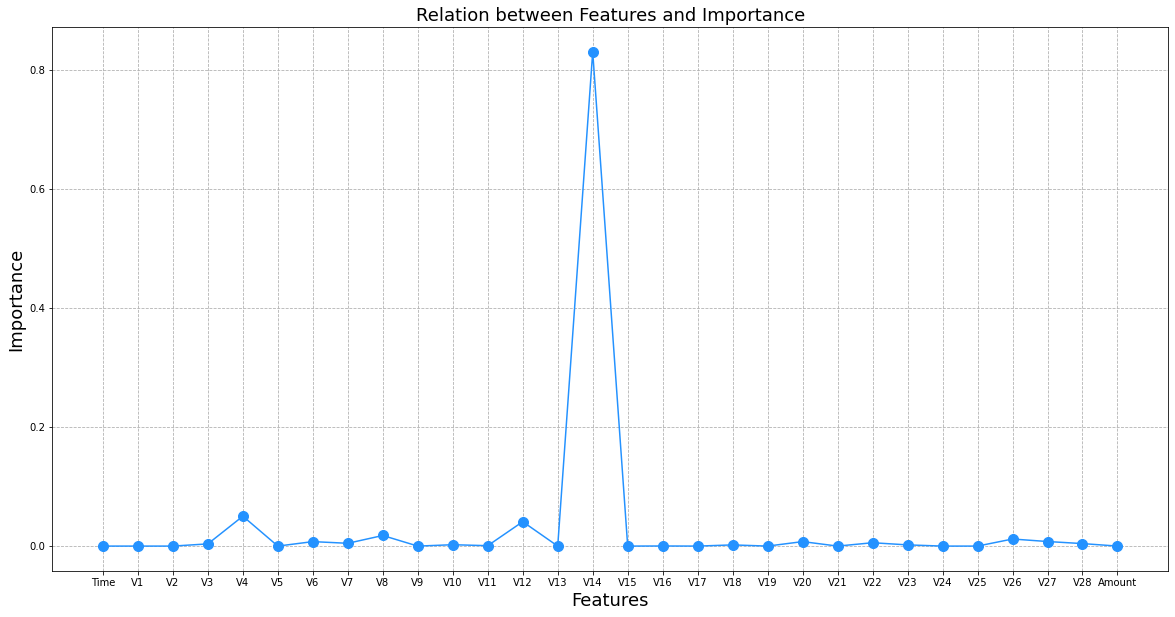

In [23]:
importance = DecisionTreeModel.feature_importances_

plt.figure(figsize=(20,10))
plt.ylabel('Importance', fontsize=18), plt.xlabel('Features', fontsize=18)
plt.title("Relation between Features and Importance", fontsize=18)
plt.plot(X.columns, importance, 'o-', color="#2492ff", markersize=10, label="Training score")
plt.grid(linestyle = '--', linewidth = 0.8)
plt.show()

### Deployment

In [28]:
# For deploying

import pickle
filename = 'Credit_fraud_detection_model.sav'
pickle.dump(DecisionTreeModel_y_pred, open(filename, 'wb'))